## Pipeline Development

In [ ]:
# %run Final_Data_Output.py
# %run model1.py
pd.set_option('display.max_columns', None)

In [ ]:
from data_load import Data

# Download all datasets
loader = Data()
loader.HOMES_FOR_SALE()
loader.INCOME()
loader.HOMICIDES()
loader.POPULATION()
loader.ZIP_COUNTY()
print("All data downloaded!")

In [ ]:
from Final_Data_Output import Final_Data

# Feature engineering
obj = Final_Data()
final_df = obj.Merge_all()

# final_df.to_csv('final_dataset.csv', index=False)
print(final_df.shape)
print(f"Columns: {final_df.columns.tolist()}")

##### Notes:
- too many features (narrow it down, some are repetitive)
- hanlde NA values, remove outliers 
- filter for sold homes only 
- use longitude & latitude instead of city

In [ ]:
# final_df.dtypes
print(final_df.shape)
print('States:', final_df['state_x'].nunique())
print('State Markets:', final_df['state_market'].nunique())
print('Cities:', final_df['city_x'].nunique())

In [ ]:
# convert to categories for memory
category_cols = ['state_x', 'buyer_profile', 'affordability_score', 'value_tier', 'family_suitability', 
                 'area_prosperity', 'safety_score', 'expansion_potential', 'buyer_profile']

def convert_category(df, category_cols):
    for col in category_cols:
        df[col] = df[col].astype('category')
    return df

final_df = convert_category(final_df, category_cols)   
# final_df[category_cols].describe()

In [40]:
# filter for sold only
final_df.isnull().sum()
final_df = final_df[final_df['status'] == 'sold']
print(final_df.shape)

final_df.to_csv('Data/final_dataset.csv', index=False)

(606926, 55)


# Run Full Pipeline

In [22]:
from model_pipeline import DataPipeline
obj = DataPipeline()

stats, x_train, x_test, y_train, y_test = obj.run_pipeline(use_sample=True,
                 model_type='random_forest',
                 save_output=False)

Data Shape: (606926, 55)
Column Names: ['Unnamed: 0_x', 'brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city_x', 'state_x', 'zip_code', 'house_size', 'prev_sold_date', 'N1', 'A00100', 'Household_AGI', 'Total_Pop', 'Unnamed: 0_y', 'GEOID', 'res_ratio', 'bus_ratio', 'oth_ratio', 'tot_ratio', 'city_y', 'state_y', 'NAME', 'ST_NAME', 'Period', 'Count', 'Rate', 'price_to_income_ratio', 'affordability_score', 'price_per_sqft', 'value_tier', 'total_rooms', 'bed_bath_ratio', 'space_per_room', 'family_suitability', 'economic_health', 'area_prosperity', 'safety_score', 'population_density', 'lifestyle_type', 'lot_to_house_ratio', 'expansion_potential', 'zip_region', 'state_market', 'affordability_numeric', 'value_numeric', 'safety_numeric', 'recommendation_score', 'buyer_profile', 'log_price', 'log_income', 'log_house_size']

Data Types
: Unnamed: 0_x               int64
brokered_by              float64
status                    object
price                    float64
bed 

,Unnamed: 0_x,brokered_by,status,price,bed,bath,acre_lot,street,city_x,state_x,...,zip_region,state_market,affordability_numeric,value_numeric,safety_numeric,recommendation_score,buyer_profile,log_price,log_income,log_house_size
0,1414374,72457.0,sold,524900.0,3.0,2.0,0.09,1850809.0,Aguada,Puerto Rico,...,6,NaN,NaN,39,100,NaN,Move-Up Buyer,13.170965,NaN,7.696667
1,1414376,61711.0,sold,90000.0,3.0,2.0,0.08,141421.0,Aguadilla,Puerto Rico,...,6,NaN,NaN,97,100,NaN,Move-Up Buyer,11.407576,NaN,7.259820
2,1414377,49592.0,sold,22500.0,2.0,1.0,0.32,1889894.0,Anasco,Puerto Rico,...,6,NaN,NaN,100,100,NaN,First-Time Buyer,10.021315,NaN,6.746412
3,1414378,72408.0,sold,168000.0,6.0,4.0,0.05,1157317.0,Anasco,Puerto Rico,...,6,NaN,NaN,99,100,NaN,Family Buyer,12.031725,NaN,8.138273
4,1414379,60830.0,sold,200000.0,3.0,1.0,4.98,1855411.0,Arecibo,Puerto Rico,...,6,NaN,NaN,20,100,NaN,Move-Up Buyer,12.206078,NaN,6.364751



Sample df Shape: (5000, 55)
Split Training: 0.8


,metric,value
0,original_rows,5000.000000
1,original_cols,55.000000
2,train_size,3964.000000
3,test_size,992.000000
4,num_features,4975.000000
5,target_mean,519103.466700
6,target_std,812412.287691


MSE: 203498684178.98788 
MAE: 28382.13263104839
R2: 0.8040659937338349


In [ ]:
# step by step
df = load_data(use_sample=True)
X, y = prepare_data(df)
X_train, X_test, y_train, y_test = split_data(X, y)
y_pred = fit_model(X_train, X_test, y_train, y_test, model='random_forest')

run_pipeline()

In [ ]:
# %run model1.py

## Flow Chart

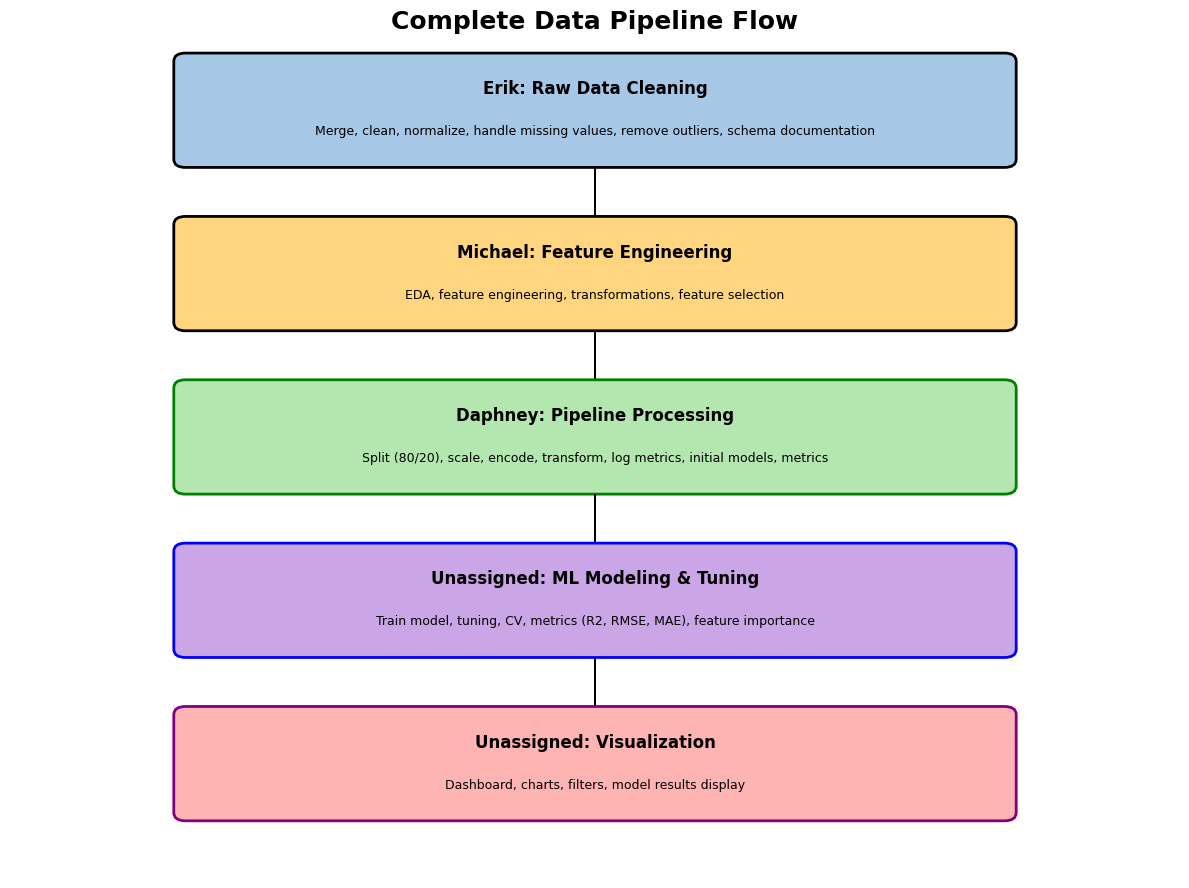

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 9))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10.5)
ax.axis('off')

ax.text(5, 10.4, 'Complete Data Pipeline Flow', fontsize=18, fontweight='bold', ha='center')

box_width = 7
box_height = 1.2
x_center = 5
gap = 0.8  

y1 = 8.8
rect1 = patches.FancyBboxPatch((x_center - box_width / 2, y1), box_width, box_height,
                               boxstyle="round,pad=0.1", facecolor='#A7C7E7', edgecolor='black', linewidth=2)
ax.add_patch(rect1)
ax.text(x_center, y1 + 0.8, 'Erik: Raw Data Cleaning', fontsize=12, fontweight='bold', ha='center')
ax.text(x_center, y1 + 0.3, 'Merge, clean, normalize, handle missing values, remove outliers, schema documentation',
        fontsize=9, ha='center')
ax.arrow(x_center, y1 - 0.1, 0, -gap + 0.05, head_width=0.2, head_length=0.1, fc='black')


y2 = y1 - (gap + box_height)
rect2 = patches.FancyBboxPatch((x_center - box_width / 2, y2), box_width, box_height,
                               boxstyle="round,pad=0.1", facecolor='#FFD580', edgecolor='black', linewidth=2)
ax.add_patch(rect2)
ax.text(x_center, y2 + 0.8, 'Michael: Feature Engineering', fontsize=12, fontweight='bold', ha='center')
ax.text(x_center, y2 + 0.3, 'EDA, feature engineering, transformations, feature selection',
        fontsize=9, ha='center')
ax.arrow(x_center, y2 - 0.1, 0, -gap + 0.05, head_width=0.2, head_length=0.1, fc='black')


y3 = y2 - (gap + box_height)
rect3 = patches.FancyBboxPatch((x_center - box_width / 2, y3), box_width, box_height,
                               boxstyle="round,pad=0.1", facecolor='#B4E7B0', edgecolor='green', linewidth=2)
ax.add_patch(rect3)
ax.text(x_center, y3 + 0.8, 'Daphney: Pipeline Processing', fontsize=12, fontweight='bold', ha='center')
ax.text(x_center, y3 + 0.3, 'Split (80/20), scale, encode, transform, log metrics, initial models, metrics',
        fontsize=9, ha='center')
ax.arrow(x_center, y3 - 0.1, 0, -gap + 0.05, head_width=0.2, head_length=0.1, fc='black')


y4 = y3 - (gap + box_height)
rect4 = patches.FancyBboxPatch((x_center - box_width / 2, y4), box_width, box_height,
                               boxstyle="round,pad=0.1", facecolor='#CBA6E7', edgecolor='blue', linewidth=2)
ax.add_patch(rect4)
ax.text(x_center, y4 + 0.8, 'Unassigned: ML Modeling & Tuning', fontsize=12, fontweight='bold', ha='center')
ax.text(x_center, y4 + 0.3, 'Train model, tuning, CV, metrics (R2, RMSE, MAE), feature importance',
        fontsize=9, ha='center')
ax.arrow(x_center, y4 - 0.1, 0, -gap + 0.05, head_width=0.2, head_length=0.1, fc='black')


y5 = y4 - (gap + box_height)
rect5 = patches.FancyBboxPatch((x_center - box_width / 2, y5), box_width, box_height,
                               boxstyle="round,pad=0.1", facecolor='#FFB4B4', edgecolor='purple', linewidth=2)
ax.add_patch(rect5)
ax.text(x_center, y5 + 0.8, 'Unassigned: Visualization', fontsize=12, fontweight='bold', ha='center')
ax.text(x_center, y5 + 0.3, 'Dashboard, charts, filters, model results display',
        fontsize=9, ha='center')
plt.savefig('Flow_chart.png')
plt.tight_layout()
plt.show()
